# **Satellite Image Classification using CNN**
## **Group-18 - Final Project - CSCN8010** 

### **Splitting the Satellite Images into train, test, and validation sets**

In [39]:
import os
import shutil
import random
import math

# Set the source directory where your subfolders are located
source_dir = "C:/Users/dwara/OneDrive/Desktop/Ryan/CSCN8010/data/Project_Dataset_Satellite_Images"

# Define the target ratios for splitting
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Function to split and move images
def split_and_move_images(source_folder):
    # Get a list of image filenames in the source folder
    image_files = [f for f in os.listdir(source_folder) if f.lower().endswith('.jpg') or f.lower().endswith('.png')]

    # Calculate the number of images for each split
    num_images = len(image_files)
    num_train = math.ceil(num_images * train_ratio)
    num_val = math.ceil(num_images * val_ratio)
    num_test = num_images - num_train - num_val

    # Shuffle the image list to distribute randomly
    random.shuffle(image_files)

    # Move images to respective splits
    for i, image_file in enumerate(image_files):
        source_path = os.path.join(source_folder, image_file)

        if i < num_train:
            target_split_folder = os.path.join(source_folder, 'train')
        elif i < num_train + num_val:
            target_split_folder = os.path.join(source_folder, 'val')
        else:
            target_split_folder = os.path.join(source_folder, 'test')

        target_path = os.path.join(target_split_folder, image_file)
        os.makedirs(target_split_folder, exist_ok=True)
        shutil.move(source_path, target_path)

# Loop through subfolders and split images
for subfolder in os.listdir(source_dir):
    subfolder_path = os.path.join(source_dir, subfolder)
    if os.path.isdir(subfolder_path):
        split_and_move_images(subfolder_path)

print("Image splitting and moving completed.")

Image splitting and moving completed.


### **Organizing train, test, and val folders with respective classes inside them**

In [40]:
# import os
# import shutil

# data_folder = "C:/Users/dwara/OneDrive/Desktop/Ryan/CSCN8010/data/Project_Dataset_Satellite_Images"
# output_folder = "C:/Users/dwara/OneDrive/Desktop/Ryan/CSCN8010/data/Organized_Project_Satellite_Images"

# # Create output folders if they don't exist
# os.makedirs(output_folder, exist_ok=True)
# os.makedirs(os.path.join(output_folder, 'train'), exist_ok=True)
# os.makedirs(os.path.join(output_folder, 'test'), exist_ok=True)
# os.makedirs(os.path.join(output_folder, 'validation'), exist_ok=True)

# # List of classes
# classes = ['cloudy', 'desert', 'green_area', 'water']

# # Organize train, test, and validation images
# for class_name in classes:
#     class_train_dir = os.path.join(data_folder, class_name, 'train')
#     class_test_dir = os.path.join(data_folder, class_name, 'test')
#     class_val_dir = os.path.join(data_folder, class_name, 'val')

#     class_train_output = os.path.join(output_folder, 'train', class_name)
#     class_test_output = os.path.join(output_folder, 'test', class_name)
#     class_val_output = os.path.join(output_folder, 'validation', class_name)

#     # Copy images to output folders
#     shutil.copytree(class_train_dir, class_train_output)
#     shutil.copytree(class_test_dir, class_test_output)
#     shutil.copytree(class_val_dir, class_val_output)

# print("Data organization completed.")

### **Importing train, test, and validation images**

In [41]:
# from tensorflow.keras.utils import image_dataset_from_directory

# data_folder = pathlib.Path("C:/Users/dwara/OneDrive/Desktop/Ryan/CSCN8010/data/Organized_Project_Satellite_Images")

# train_dataset = image_dataset_from_directory(
#     data_folder / "train",
#     image_size=(64, 64),
#     batch_size=32)
# validation_dataset = image_dataset_from_directory(
#     data_folder / "validation",
#     image_size=(64, 64),
#     batch_size=32)
# test_dataset = image_dataset_from_directory(
#     data_folder / "test",
#     image_size=(64, 64),
#     batch_size=32)

### **Defining the Convolutional model**

#### **Data Augmentation**

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define a custom preprocessing function for train data

def custom_preprocessing(image):
    # Resize the image to the target size
    resized_image = tf.image.resize(image, (64, 64))
    
    # Normalize pixel values to [0, 1]
    normalized_image = resized_image / 255.0
    
    # Apply random contrast adjustment
    contrast_factor = np.random.uniform(0.8, 1.2)
    contrast_adjusted_image = tf.image.adjust_contrast(normalized_image, contrast_factor)
    
    # Apply random brightness adjustment
    brightness_factor = np.random.uniform(0.8, 1.2)
    brightness_adjusted_image = tf.image.adjust_brightness(contrast_adjusted_image, brightness_factor)
    
    return brightness_adjusted_image


# Paths to your train, test, and validation data directories
train_data_dir = "C:/Users/dwara/OneDrive/Desktop/Ryan/CSCN8010/data/Organized_Project_Satellite_Images/train"
test_data_dir = "C:/Users/dwara/OneDrive/Desktop/Ryan/CSCN8010/data/Organized_Project_Satellite_Images/test"
val_data_dir = "C:/Users/dwara/OneDrive/Desktop/Ryan/CSCN8010/data/Organized_Project_Satellite_Images/validation"

# Create an ImageDataGenerator without augmentation for test and validation datasets
test_data_generator = ImageDataGenerator(
    preprocessing_function=custom_preprocessing
)

val_data_generator = ImageDataGenerator(
    preprocessing_function=custom_preprocessing
)

# Create an ImageDataGenerator with augmentation and custom preprocessing
data_augmentation = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    preprocessing_function=custom_preprocessing  # Assign the custom preprocessing function
)

# Create generators for train, test, and validation datasets
train_generator = data_augmentation.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_data_generator.flow_from_directory(
    val_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 3379 images belonging to 4 classes.
Found 1125 images belonging to 4 classes.
Found 1127 images belonging to 4 classes.


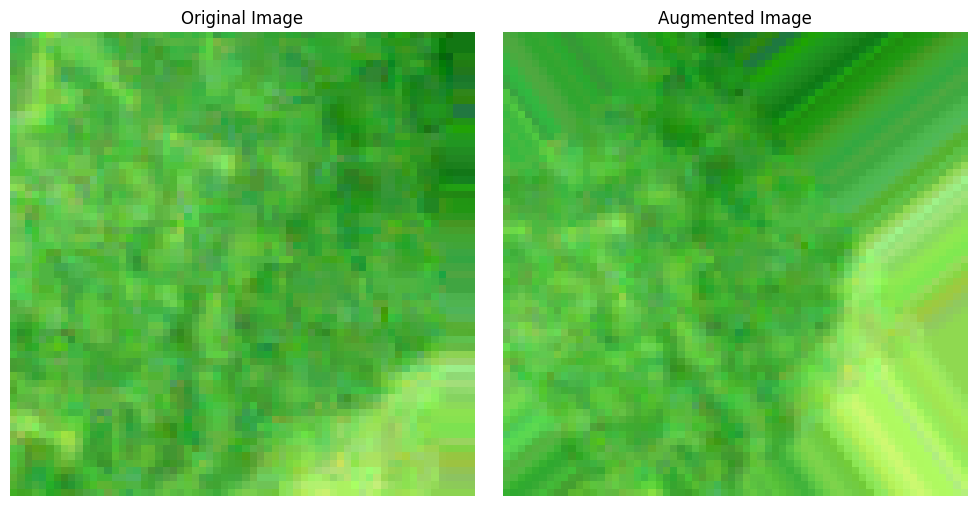

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Create a PrefetchDataset from the train generator
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
    )
)

# Take 1 batch from the dataset
train_dataset = train_dataset.take(1)

# Get a single batch of images
for images, _ in train_dataset:
    break

# Choose a single image for visualization
image_to_augment = images[10]

# Convert the image to a NumPy array
image_np = image_to_augment.numpy()

# Convert the original image to a PIL image for visualization
original_pil_image = tf.keras.preprocessing.image.array_to_img(image_np)

# Apply data augmentation directly to the image
augmented_image = data_augmentation.random_transform(image_np)

# Convert the augmented image to a PIL image for visualization
augmented_pil_image = tf.keras.preprocessing.image.array_to_img(augmented_image)

# Visualize the original and augmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_pil_image)
plt.title("Original Image")
plt.axis("off")

# Augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_pil_image)
plt.title("Augmented Image")
plt.axis("off")

plt.tight_layout()
plt.show()

### **Convolution Neural Networks - Image Classification**

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

# Define input shape
inputs = keras.Input(shape=(64, 64, 3))

# Build the convolutional base
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Add a fully connected layer and additional dense layers
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)  # Additional dense layer
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)  # Additional dense layer
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

In [45]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 12, 12, 128)       7385

In [46]:
# Compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics = ["accuracy"])
              
# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Set the steps per epoch
    epochs=100,
    validation_data=val_generator,
    validation_steps=len(val_generator),  # Set the validation steps
    callbacks=callbacks
)

Epoch 1/100
106/106 [==============================] - 38s 335ms/step - loss: 1.3973 - accuracy: 0.2465 - val_loss: 1.3715 - val_accuracy: 0.2662
Epoch 2/100
106/106 [==============================] - 31s 292ms/step - loss: 1.3756 - accuracy: 0.2883 - val_loss: 1.3555 - val_accuracy: 0.2662
Epoch 3/100
106/106 [==============================] - 31s 288ms/step - loss: 1.3525 - accuracy: 0.3152 - val_loss: 1.3175 - val_accuracy: 0.4028
Epoch 4/100
106/106 [==============================] - 31s 289ms/step - loss: 1.3053 - accuracy: 0.3835 - val_loss: 1.2065 - val_accuracy: 0.6566
Epoch 5/100
106/106 [==============================] - 33s 308ms/step - loss: 1.1532 - accuracy: 0.5294 - val_loss: 0.9673 - val_accuracy: 0.6957
Epoch 6/100
106/106 [==============================] - 33s 307ms/step - loss: 0.9276 - accuracy: 0.5886 - val_loss: 0.7252 - val_accuracy: 0.7427
Epoch 7/100
106/106 [==============================] - 32s 305ms/step - loss: 0.7658 - accuracy: 0.6428 - val_loss: 0.6265 -

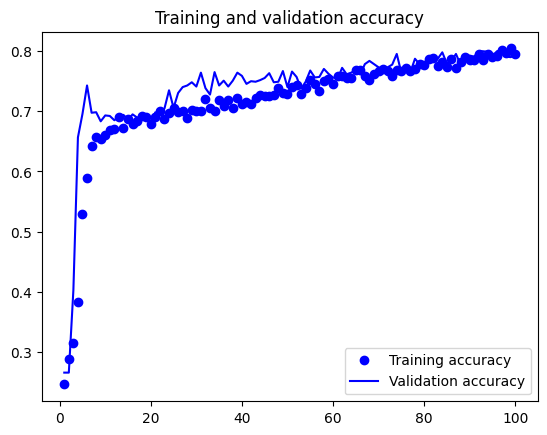

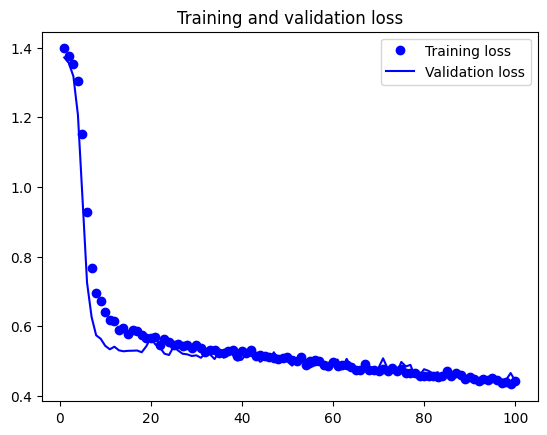

In [47]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [48]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy",test_acc)

36/36 [==============================] - 9s 255ms/step - loss: 0.4169 - accuracy: 0.8116
Test Accuracy 0.8115555644035339


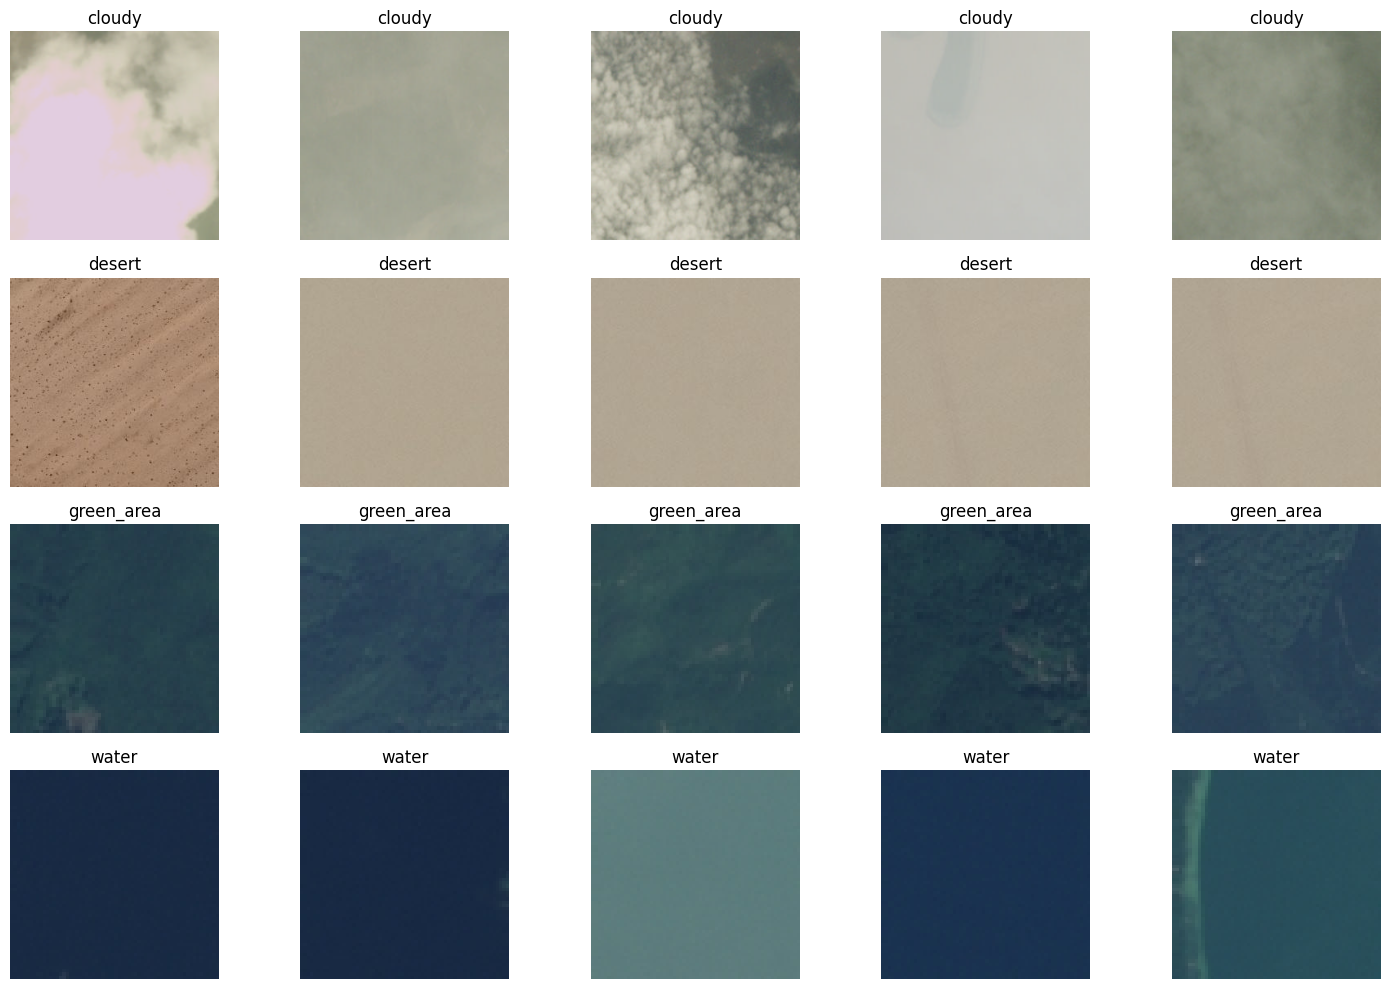

In [49]:
import matplotlib.pyplot as plt
class_names = os.listdir(train_data_dir)
from tensorflow.keras.preprocessing.image import load_img

# Displaying a few images from each class in the training set
num_images_per_class = 5

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_data_dir, class_name)
    image_names = os.listdir(class_path)[:num_images_per_class]

    for j, image_name in enumerate(image_names):
        image_path = os.path.join(class_path, image_name)
        img = load_img(image_path)
        
        plt.subplot(len(class_names), num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

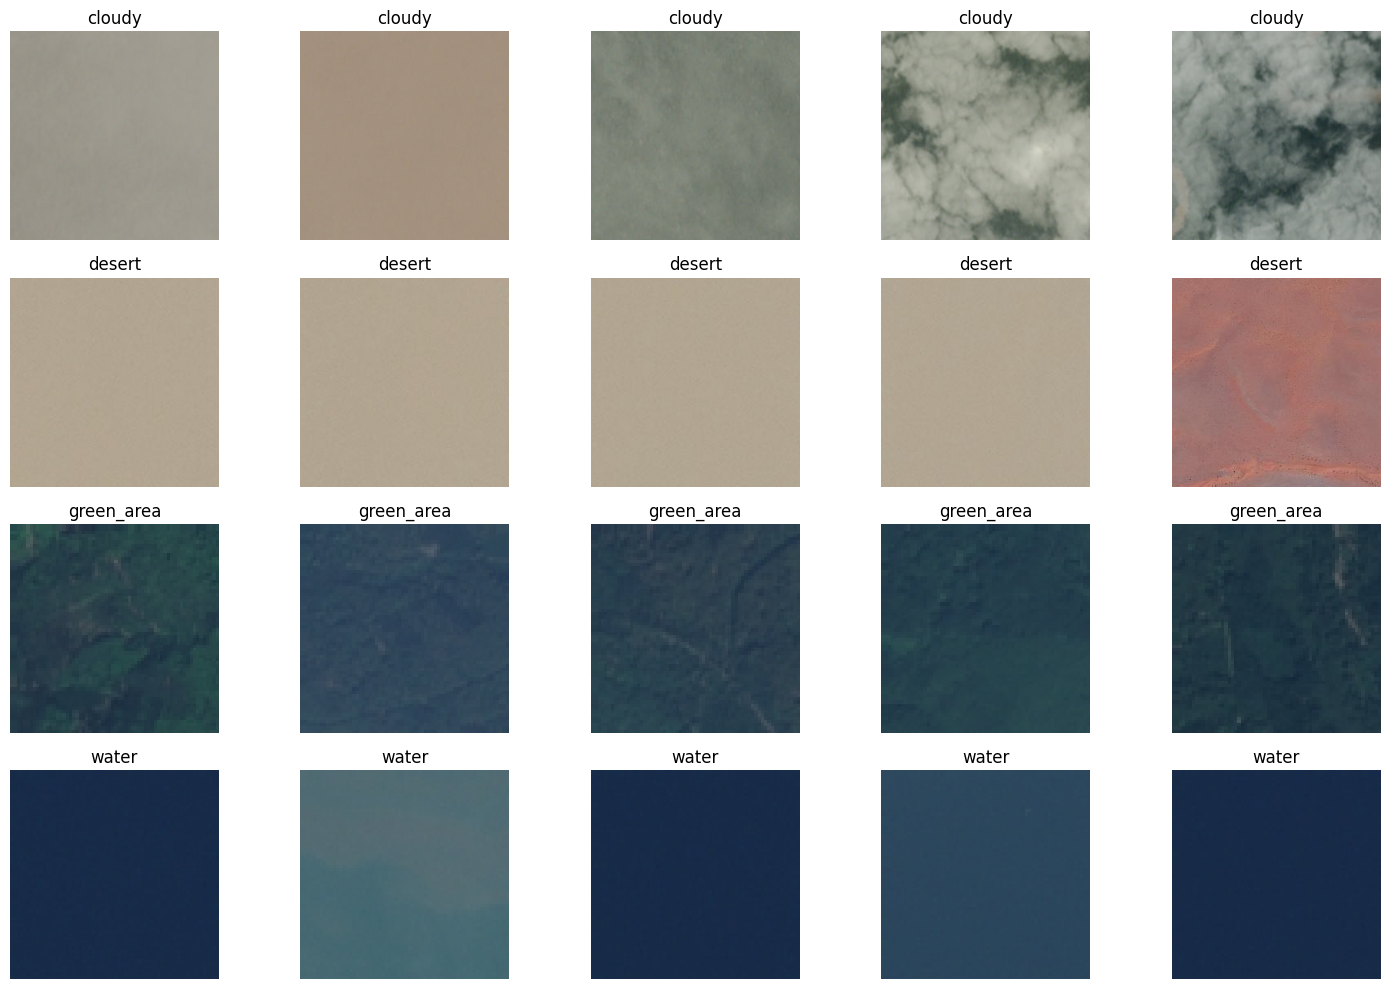

In [50]:
import matplotlib.pyplot as plt
class_names = os.listdir(test_data_dir)
from tensorflow.keras.preprocessing.image import load_img

# Display a few images from each class in the test set
num_images_per_class = 5

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    class_path = os.path.join(test_data_dir, class_name)
    image_names = os.listdir(class_path)[:num_images_per_class]

    for j, image_name in enumerate(image_names):
        image_path = os.path.join(class_path, image_name)
        img = load_img(image_path)
        
        plt.subplot(len(class_names), num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

### **Performance Evaluation**

In [51]:
# Initialize empty lists to store test images and labels
all_test_images = []
all_test_labels = []

# Loop through the test_generator to retrieve all images and labels
for batch_images, batch_labels in test_generator:
    all_test_images.append(batch_images)
    all_test_labels.append(batch_labels)
    
    # Break the loop if the generator has been exhausted
    if len(all_test_images) * test_generator.batch_size >= len(test_generator.filenames):
        break

# Convert the lists to numpy arrays
all_test_images = np.concatenate(all_test_images, axis=0)
all_test_labels = np.concatenate(all_test_labels, axis=0)

# Print the shapes of the arrays
print("All Test Images Shape:", all_test_images.shape)
print("All Test Labels Shape:", all_test_labels.shape)

All Test Images Shape: (1125, 64, 64, 3)
All Test Labels Shape: (1125, 4)


In [52]:
# Convert one-hot encoded labels to label-encoded classes
true_test_classes = np.argmax(all_test_labels, axis=1)

# Print the label-encoded classes
print("Label Encoded Classes:", true_test_classes)

Label Encoded Classes: [1 3 2 ... 0 1 3]


In [53]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

test_predictions = model.predict(all_test_images)
predicted_test_classes = np.argmax(test_predictions, axis=1)
predicted_test_classes

# Calculate test accuracy
test_accuracy = accuracy_score(true_test_classes, predicted_test_classes)
print('The test accuracy of the image classification model is:', test_accuracy)

print('\n')

# Confusion Matrix
confusion_mat = confusion_matrix(true_test_classes, predicted_test_classes)
print('The confusion matrix of the image classification model is:\n', confusion_mat)

print('\n')

# Calculate classification report
class_names = list(train_generator.class_indices.keys())  # Get the class names
class_report = classification_report(true_test_classes, predicted_test_classes, target_names=class_names)

# Print classification report
print("Classification Report:\n", class_report)



36/36 [==============================] - 2s 41ms/step
The test accuracy of the image classification model is: 0.8106666666666666


The confusion matrix of the image classification model is:
 [[268  28   1   3]
 [ 11 214   0   0]
 [  0   0 266  34]
 [  8   0 128 164]]


Classification Report:
               precision    recall  f1-score   support

      cloudy       0.93      0.89      0.91       300
      desert       0.88      0.95      0.92       225
  green_area       0.67      0.89      0.77       300
       water       0.82      0.55      0.65       300

    accuracy                           0.81      1125
   macro avg       0.83      0.82      0.81      1125
weighted avg       0.82      0.81      0.81      1125



In [54]:
# Calculate precision, recall, and F1-score
precision = precision_score(true_test_classes, predicted_test_classes, average='weighted')
recall = recall_score(true_test_classes, predicted_test_classes, average='weighted')
f1 = f1_score(true_test_classes, predicted_test_classes, average='weighted')

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8230291118486589
Recall: 0.8106666666666666
F1-Score: 0.8055045222756511


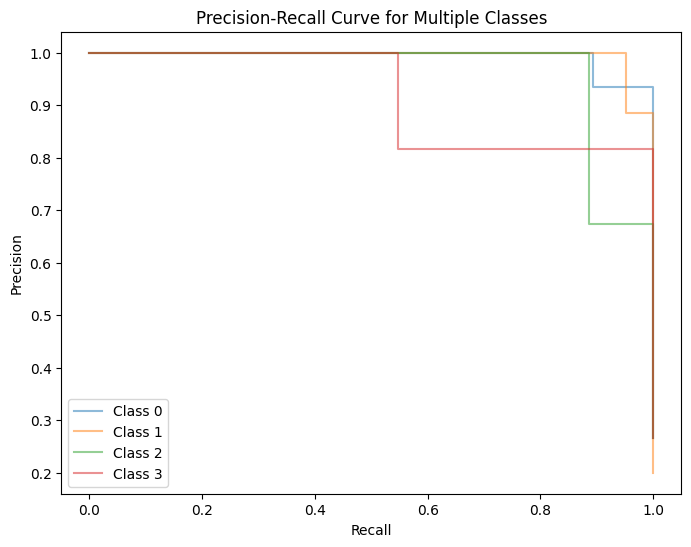

Class-wise AUC:
Class 0: AUC = 0.93
Class 1: AUC = 0.92
Class 2: AUC = 0.80
Class 3: AUC = 0.74


In [55]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

num_classes = len(np.unique(true_test_classes))

# Precision-Recall Curve and AUC
precision_curve = dict()
recall_curve = dict()
pr_auc = dict()

for class_idx in range(num_classes):
    precision_curve[class_idx], recall_curve[class_idx], _ = precision_recall_curve(
        true_test_classes == class_idx, predicted_test_classes == class_idx)
    pr_auc[class_idx] = auc(recall_curve[class_idx], precision_curve[class_idx])


# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
for class_idx in range(num_classes):
    plt.step(recall_curve[class_idx], precision_curve[class_idx], alpha=0.5, label=f'Class {class_idx}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Classes')
plt.legend(loc='best')
plt.show()

print("Class-wise AUC:")
for class_idx in range(num_classes):
    print(f"Class {class_idx}: AUC = {pr_auc[class_idx]:.2f}")

## **Creating the CNN model with 'GELU' activation and 'he_normal' initializer**

In [56]:
from tensorflow import keras
from tensorflow.keras import layers

# Define input shape
inputs = keras.Input(shape=(64, 64, 3))

# Build the convolutional base
x = layers.Conv2D(filters=32, kernel_size=3, activation="gelu", kernel_initializer="he_normal")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="gelu", kernel_initializer="he_normal")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="gelu", kernel_initializer="he_normal")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="gelu", kernel_initializer="he_normal")(x)

# Add a fully connected layer and additional dense layers
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="gelu", kernel_initializer="he_normal")(x)  # Dense layer
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="gelu", kernel_initializer="he_normal")(x)  # Dense layer
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)

# Create the model
new_model = keras.Model(inputs=inputs, outputs=outputs)

In [57]:
new_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 128)       7385

In [58]:
# Compile the model
new_model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics = ["accuracy"])
              
# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model
new_history = new_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Set the steps per epoch
    epochs=100,
    validation_data=val_generator,
    validation_steps=len(val_generator),  # Set the validation steps
    callbacks=callbacks
)

Epoch 1/100
106/106 [==============================] - 64s 580ms/step - loss: 3.6041 - accuracy: 0.2628 - val_loss: 1.2740 - val_accuracy: 0.3523
Epoch 2/100
106/106 [==============================] - 59s 556ms/step - loss: 1.9418 - accuracy: 0.3016 - val_loss: 1.1501 - val_accuracy: 0.4516
Epoch 3/100
106/106 [==============================] - 62s 585ms/step - loss: 1.3509 - accuracy: 0.3824 - val_loss: 1.0246 - val_accuracy: 0.4960
Epoch 4/100
106/106 [==============================] - 62s 580ms/step - loss: 1.1253 - accuracy: 0.4581 - val_loss: 0.9175 - val_accuracy: 0.5244
Epoch 5/100
106/106 [==============================] - 64s 605ms/step - loss: 0.9928 - accuracy: 0.4919 - val_loss: 0.8349 - val_accuracy: 0.6433
Epoch 6/100
106/106 [==============================] - 62s 584ms/step - loss: 0.9374 - accuracy: 0.4948 - val_loss: 0.7903 - val_accuracy: 0.6566
Epoch 7/100
106/106 [==============================] - 62s 585ms/step - loss: 0.8743 - accuracy: 0.5439 - val_loss: 0.7523 -

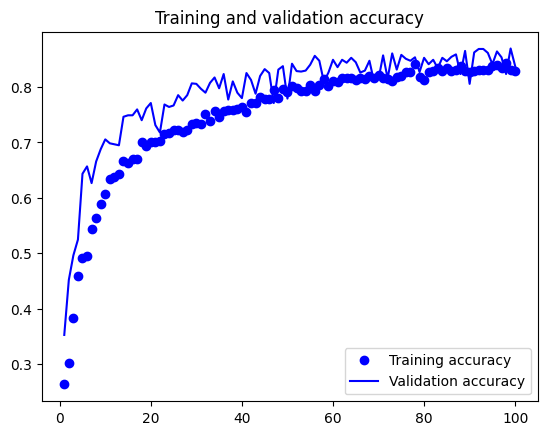

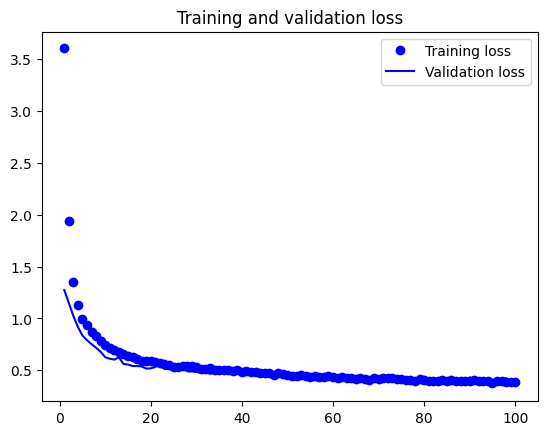

In [59]:
accuracy = new_history.history["accuracy"]
val_accuracy = new_history.history["val_accuracy"]
loss = new_history.history["loss"]
val_loss = new_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [60]:
test_loss, test_acc = new_model.evaluate(test_generator)
print("Test Accuracy",test_acc)

36/36 [==============================] - 13s 351ms/step - loss: 0.3654 - accuracy: 0.8471
Test Accuracy 0.8471111059188843


In [61]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

test_predictions = new_model.predict(all_test_images)
predicted_test_classes = np.argmax(test_predictions, axis=1)
predicted_test_classes

# Calculate test accuracy
test_accuracy = accuracy_score(true_test_classes, predicted_test_classes)
print('The test accuracy of the image classification model is:', test_accuracy)

print('\n')

# Confusion Matrix
confusion_mat = confusion_matrix(true_test_classes, predicted_test_classes)
print('The confusion matrix of the image classification model is:\n', confusion_mat)

print('\n')

# Calculate classification report
class_names = list(train_generator.class_indices.keys())  # Extract class names
class_report = classification_report(true_test_classes, predicted_test_classes, target_names=class_names)

# Print classification report
print("Classification Report:\n", class_report)

36/36 [==============================] - 3s 81ms/step
The test accuracy of the image classification model is: 0.8471111111111111


The confusion matrix of the image classification model is:
 [[271  27   1   1]
 [  7 218   0   0]
 [  1   0 285  14]
 [ 10   0 111 179]]


Classification Report:
               precision    recall  f1-score   support

      cloudy       0.94      0.90      0.92       300
      desert       0.89      0.97      0.93       225
  green_area       0.72      0.95      0.82       300
       water       0.92      0.60      0.72       300

    accuracy                           0.85      1125
   macro avg       0.87      0.85      0.85      1125
weighted avg       0.87      0.85      0.84      1125



In [62]:
# Calculate precision, recall, and F1-score
precision = precision_score(true_test_classes, predicted_test_classes, average='weighted')
recall = recall_score(true_test_classes, predicted_test_classes, average='weighted')
f1 = f1_score(true_test_classes, predicted_test_classes, average='weighted')

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8655007320279442
Recall: 0.8471111111111111
F1-Score: 0.8422494141645772


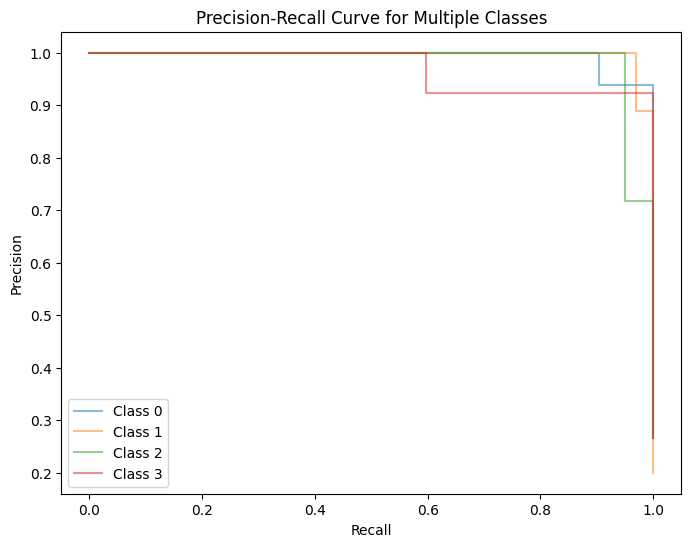

Class-wise AUC:
Class 0: AUC = 0.93
Class 1: AUC = 0.93
Class 2: AUC = 0.84
Class 3: AUC = 0.81


In [64]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

num_classes = len(np.unique(true_test_classes))

# Precision-Recall Curve and AUC
precision_curve = dict()
recall_curve = dict()
pr_auc = dict()

for class_idx in range(num_classes):
    precision_curve[class_idx], recall_curve[class_idx], _ = precision_recall_curve(
        true_test_classes == class_idx, predicted_test_classes == class_idx)
    pr_auc[class_idx] = auc(recall_curve[class_idx], precision_curve[class_idx])


# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
for class_idx in range(num_classes):
    plt.step(recall_curve[class_idx], precision_curve[class_idx], alpha=0.5, label=f'Class {class_idx}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Classes')
plt.legend(loc='best')
plt.show()

print("Class-wise AUC:")
for class_idx in range(num_classes):
    print(f"Class {class_idx}: AUC = {pr_auc[class_idx]:.2f}")

## **Creating CNN model with Batch Normalization**

In [66]:
from tensorflow import keras
from tensorflow.keras import layers

# Define input shape
inputs = keras.Input(shape=(64, 64, 3))

# Build the convolutional base with batch normalization
x = layers.Conv2D(filters=32, kernel_size=3, activation = 'gelu', kernel_initializer="he_normal")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation = 'gelu', kernel_initializer="he_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation = 'gelu', kernel_initializer="he_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation = 'gelu', kernel_initializer="he_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)

# Add a fully connected layer and additional dense layers with batch normalization
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation = 'gelu', kernel_initializer="he_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)

x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation = 'gelu', kernel_initializer="he_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)

# Create the model
batch_norm_model = keras.Model(inputs=inputs, outputs=outputs)


In [67]:
batch_norm_model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 62, 62, 32)       128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 29, 29, 64)        184

In [68]:
# Compile the model
batch_norm_model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics = ["accuracy"])
              
# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model
batch_norm_history = batch_norm_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Set the steps per epoch
    epochs=100,
    validation_data=val_generator,
    validation_steps=len(val_generator),  # Set the validation steps
    callbacks=callbacks
)

Epoch 1/100
106/106 [==============================] - 125s 1s/step - loss: 1.9128 - accuracy: 0.2835 - val_loss: 1.3425 - val_accuracy: 0.2910
Epoch 2/100
106/106 [==============================] - 112s 1s/step - loss: 1.7085 - accuracy: 0.3430 - val_loss: 1.3100 - val_accuracy: 0.4463
Epoch 3/100
106/106 [==============================] - 113s 1s/step - loss: 1.4983 - accuracy: 0.4131 - val_loss: 1.2803 - val_accuracy: 0.4428
Epoch 4/100
106/106 [==============================] - 112s 1s/step - loss: 1.3619 - accuracy: 0.4661 - val_loss: 1.2457 - val_accuracy: 0.4783
Epoch 5/100
106/106 [==============================] - 112s 1s/step - loss: 1.2449 - accuracy: 0.5220 - val_loss: 1.1891 - val_accuracy: 0.5581
Epoch 6/100
106/106 [==============================] - 114s 1s/step - loss: 1.1875 - accuracy: 0.5534 - val_loss: 1.0559 - val_accuracy: 0.6664
Epoch 7/100
106/106 [==============================] - 112s 1s/step - loss: 1.0728 - accuracy: 0.5771 - val_loss: 0.9372 - val_accuracy:

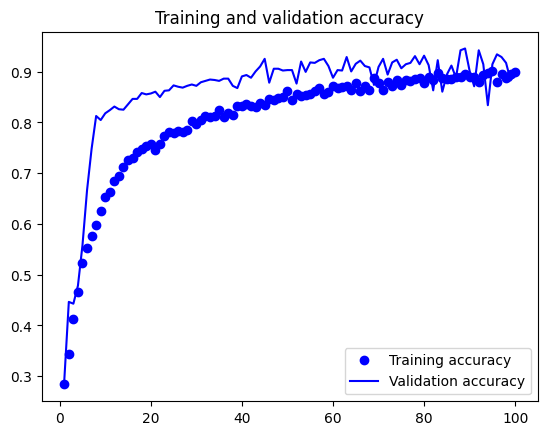

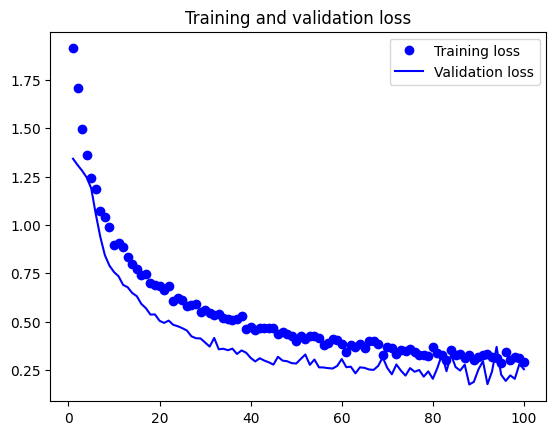

In [75]:
accuracy = batch_norm_history.history["accuracy"]
val_accuracy = batch_norm_history.history["val_accuracy"]
loss = batch_norm_history.history["loss"]
val_loss = batch_norm_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [77]:
test_loss, test_acc = batch_norm_model.evaluate(test_generator)
print("Test Accuracy",test_acc)

36/36 [==============================] - 22s 587ms/step - loss: 0.2596 - accuracy: 0.8916
Test Accuracy 0.8915555477142334


In [71]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

test_predictions = batch_norm_model.predict(all_test_images)
predicted_test_classes = np.argmax(test_predictions, axis=1)
predicted_test_classes

# Calculate test accuracy
test_accuracy = accuracy_score(true_test_classes, predicted_test_classes)
print('The test accuracy of the image classification model is:', test_accuracy)

print('\n')

# Confusion Matrix
confusion_mat = confusion_matrix(true_test_classes, predicted_test_classes)
print('The confusion matrix of the image classification model is:\n', confusion_mat)

print('\n')

# Calculate classification report
class_names = list(train_generator.class_indices.keys())  # Get the class names
class_report = classification_report(true_test_classes, predicted_test_classes, target_names=class_names)

# Print classification report
print("Classification Report:\n", class_report)



36/36 [==============================] - 9s 223ms/step
The test accuracy of the image classification model is: 0.9013333333333333


The confusion matrix of the image classification model is:
 [[273  25   0   2]
 [  6 219   0   0]
 [  0   0 300   0]
 [  4   0  74 222]]


Classification Report:
               precision    recall  f1-score   support

      cloudy       0.96      0.91      0.94       300
      desert       0.90      0.97      0.93       225
  green_area       0.80      1.00      0.89       300
       water       0.99      0.74      0.85       300

    accuracy                           0.90      1125
   macro avg       0.91      0.91      0.90      1125
weighted avg       0.91      0.90      0.90      1125



In [72]:
# Calculate precision, recall, and F1-score
precision = precision_score(true_test_classes, predicted_test_classes, average='weighted')
recall = recall_score(true_test_classes, predicted_test_classes, average='weighted')
f1 = f1_score(true_test_classes, predicted_test_classes, average='weighted')

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9149414705769506
Recall: 0.9013333333333333
F1-Score: 0.8998660164242686


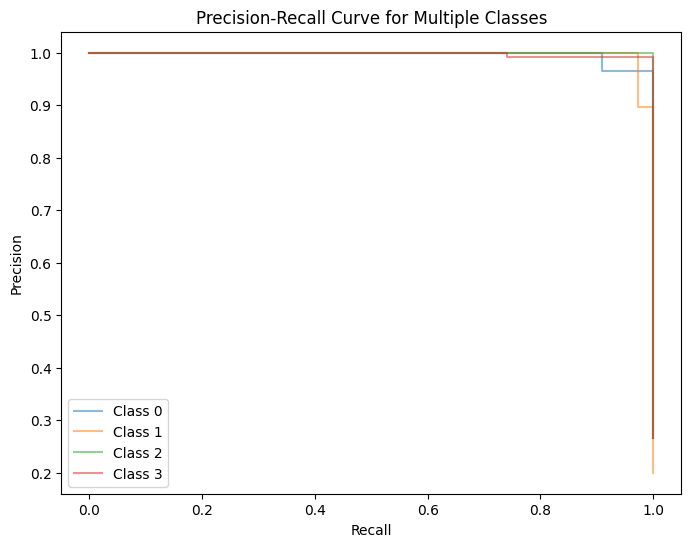

Class-wise AUC:
Class 0: AUC = 0.95
Class 1: AUC = 0.94
Class 2: AUC = 0.90
Class 3: AUC = 0.90


In [73]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

num_classes = len(np.unique(true_test_classes))

# Precision-Recall Curve and AUC
precision_curve = dict()
recall_curve = dict()
pr_auc = dict()

for class_idx in range(num_classes):
    precision_curve[class_idx], recall_curve[class_idx], _ = precision_recall_curve(
        true_test_classes == class_idx, predicted_test_classes == class_idx)
    pr_auc[class_idx] = auc(recall_curve[class_idx], precision_curve[class_idx])


# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
for class_idx in range(num_classes):
    plt.step(recall_curve[class_idx], precision_curve[class_idx], alpha=0.5, label=f'Class {class_idx}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Classes')
plt.legend(loc='best')
plt.show()

print("Class-wise AUC:")
for class_idx in range(num_classes):
    print(f"Class {class_idx}: AUC = {pr_auc[class_idx]:.2f}")

In [78]:
#batch_norm_model.save('Final_Model_SIC.h5')
#model = tf.keras.models.load_model('Final_Project_Satellite_Image_Classification.h5')